## MODELING

### Roadmap:
(1) Random Forest for feature importance

(2) Clustering (optional)

(3) SVM

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from __future__ import division

In [4]:
import seaborn as sns

In [5]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
from sklearn.metrics import roc_auc_score

In [7]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

In [8]:
train = pd.read_csv("../assets/train_complete_mg.csv")

In [9]:
test = pd.read_csv("../assets/test_complete_mg.csv")

In [10]:
X = train.drop("WnvPresent", axis = 1) ##setting up df of possible explanatory variables

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

In [13]:
X["TrapCoded"] = le.fit_transform(X.Trap)

In [14]:
X.drop(["Trap", "YMD", "Sunrise", "Sunset", "Species", "NumMosquitos" ], axis = 1, inplace = True)

In [15]:
y = train.WnvPresent ##and array of dependent variable

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 19)
##splitting up original train file into train-test sections, to validate model

In [17]:
from sklearn.model_selection import StratifiedKFold

In [18]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=24) ##stratifying the cross validation

In [19]:
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print rf.score(X_test, y_test)

0.934667083464


In [20]:
confusion_matrix(y_test, y_pred)

array([[2968,   55],
       [ 154,   22]])

In [21]:
##Confusion Matrix: 
##True Negatives(0,0) = 2969
##False Negatives(1,0) = 152 (classified 0, actually 1)
##True Positives(1,1) = 24
##False Positives(0,1) = 54 (predicted 1, actually 0)

In [22]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.98      0.97      3023
          1       0.29      0.12      0.17       176

avg / total       0.91      0.93      0.92      3199



In [23]:
##Classification Report:
#Precision: when predicting, 0, how often correct? = TN / TN + FN  
    #when predicting 1, how often correct? = TP / TP + FP 
    
#Recall(1) = Sensitivity = TP / TP + FN = 
    #Recall(0) = How often does model predict no, when it is actually no?
            #TN / TN + FP
#f1-score = weighted average of precision and recall
    #f1 = 2*(precision*recall) / (precision+recall)

#support = number of observations for each class in actual data (not predictions)

(-1, 39)

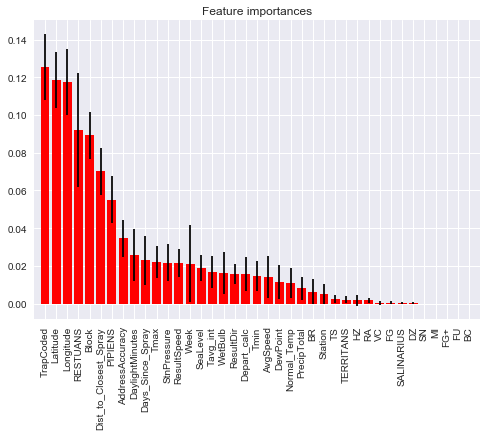

In [24]:
all(rf.feature_importances_ == np.mean([tree.feature_importances_ for tree in rf.estimators_], axis=0))

importances = rf.feature_importances_
# calculate the standard deviation of feature importances by looping over the trees in the random forest
# 

std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])

In [25]:
s = cross_val_score(rf, X_train, y_train, cv=cv, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("Random Forest", s.mean().round(3), s.std().round(3))


Random Forest Score:	0.94 ± 0.004


In [26]:
probabilities = rf.predict_proba(X_test) # Need the second value

probability_list = [] # Becomes the list of probabilities
for i in probabilities:
    probability_list.append(i[1])
    probabilities = probability_list

roc_auc = roc_auc_score(y_test, probabilities)
print roc_auc

0.686246353712


In [27]:
X2 = X[["TrapCoded", "RESTUANS", "PIPIENS", "DaylightMinutes", "DewPoint", "Tmax", "Week", "Dist_to_Closest_Spray", "Days_Since_Spray"]]

In [28]:
X2.head()

,TrapCoded,RESTUANS,PIPIENS,DaylightMinutes,DewPoint,Tmax,Week,Dist_to_Closest_Spray,Days_Since_Spray
0,1,1,1,896,59,88,22,1.5,720
1,1,1,0,896,59,88,22,1.5,720
2,6,1,0,896,58,88,22,1.5,720
3,13,1,1,896,58,88,22,1.5,720
4,13,1,0,896,58,88,22,1.5,720


In [29]:
y = train.WnvPresent

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.33, random_state = 54, stratify = y)

In [31]:
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print rf.score(X_test, y_test)

0.935917474211


In [32]:
confusion_matrix(y_test, y_pred)

array([[2972,   61],
       [ 144,   22]])

In [33]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.98      0.97      3033
          1       0.27      0.13      0.18       166

avg / total       0.92      0.94      0.93      3199



(-1, 9)

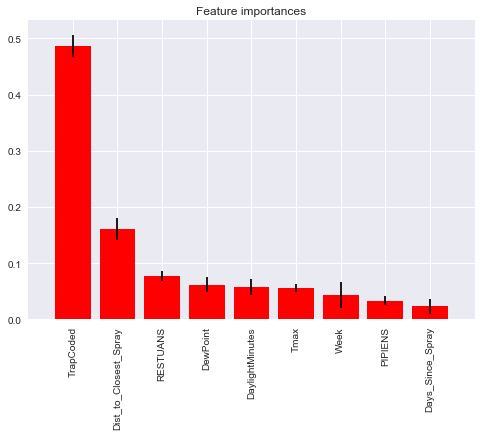

In [34]:
all(rf.feature_importances_ == np.mean([tree.feature_importances_ for tree in rf.estimators_], axis=0))

importances = rf.feature_importances_
# calculate the standard deviation of feature importances by looping over the trees in the random forest
# 

std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

indices = np.argsort(importances)[::-1]
feature_names = X2.columns

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X2.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X2.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X2.shape[1]])

In [35]:
s = cross_val_score(rf, X_train, y_train, cv=cv, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("Random Forest", s.mean().round(3), s.std().round(3))


Random Forest Score:	0.929 ± 0.004


In [36]:
probabilities = rf.predict_proba(X_test) # Need the second value

probability_list = [] # Becomes the list of probabilities
for i in probabilities:
    probability_list.append(i[1])
    probabilities = probability_list

roc_auc = roc_auc_score(y_test, probabilities)
print roc_auc

0.723047481717


In [37]:
rf = RandomForestClassifier(n_estimators=20, max_depth = 5, n_jobs=-1, verbose = 1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print rf.score(X_test, y_test)

[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished


0.948108783995


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished


In [38]:
confusion_matrix(y_test, y_pred)

array([[3033,    0],
       [ 166,    0]])

In [39]:
print (classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97      3033
          1       0.00      0.00      0.00       166

avg / total       0.90      0.95      0.92      3199



/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(-1, 9)

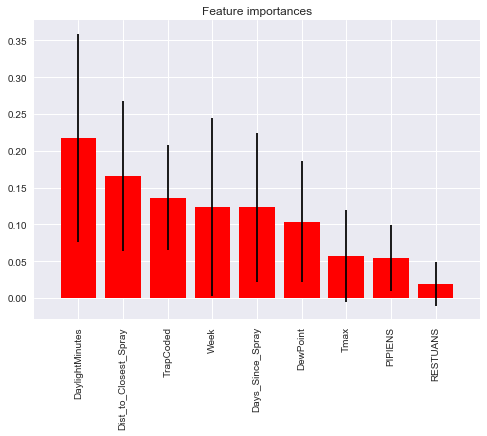

In [40]:
all(rf.feature_importances_ == np.mean([tree.feature_importances_ for tree in rf.estimators_], axis=0))

importances = rf.feature_importances_
# calculate the standard deviation of feature importances by looping over the trees in the random forest
# 

std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

indices = np.argsort(importances)[::-1]
feature_names = X2.columns

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X2.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X2.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X2.shape[1]])

In [41]:
probabilities = rf.predict_proba(X_test) # Need the second value

probability_list = [] # Becomes the list of probabilities
for i in probabilities:
    probability_list.append(i[1])
    probabilities = probability_list

roc_auc = roc_auc_score(y_test, probabilities)
print roc_auc

0.847151216141


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished


In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
rf = RandomForestClassifier(class_weight = "balanced")

In [44]:
params = {
    "n_estimators": (5, 10, 20, 25, 30, 40),
    "criterion": ("gini", "entropy"),
    "max_depth": (20, 40, 60, 80)   
}

In [45]:
gridlock = GridSearchCV(rf, params, verbose = 1, cv = cv, n_jobs = -1)
gridlock.fit(X2, y)
print gridlock
print "Best score :"
print gridlock.best_score_
print gridlock.best_estimator_
print gridlock.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    6.1s


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=24, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': (5, 10, 20, 25, 30, 40), 'criterion': ('gini', 'entropy'), 'max_depth': (20, 40, 60, 80)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)
Best score :
0.927886103374
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=40, max_features='auto',
            max_leaf_nodes=None, min_impurity_spli

[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   12.1s finished


In [46]:
rf_upgrade = RandomForestClassifier(criterion = "entropy", class_weight = "balanced", max_depth = 80, n_jobs = -1, verbose = 1)

In [47]:
rf_upgrade.fit(X_train, y_train)
y_pred = rf_upgrade.predict(X_test)
print rf_upgrade.score(X_test, y_test)

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


0.926226945921


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


In [48]:
confusion_matrix(y_test, y_pred)

array([[2931,  102],
       [ 134,   32]])

In [49]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.97      0.96      3033
          1       0.24      0.19      0.21       166

avg / total       0.92      0.93      0.92      3199



(-1, 9)

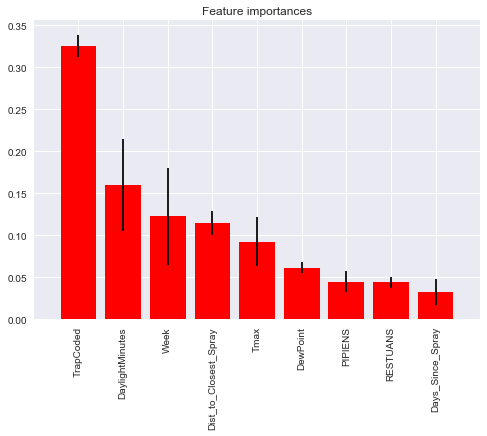

In [50]:
all(rf_upgrade.feature_importances_ == np.mean([tree.feature_importances_ for tree in rf_upgrade.estimators_], axis=0))

importances = rf_upgrade.feature_importances_
# calculate the standard deviation of feature importances by looping over the trees in the random forest
# 

std = np.std([tree.feature_importances_ for tree in rf_upgrade.estimators_], axis=0)

indices = np.argsort(importances)[::-1]
feature_names = X2.columns

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X2.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X2.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X2.shape[1]])

In [51]:
probabilities = rf_upgrade.predict_proba(X_test) # Need the second value

probability_list = [] # Becomes the list of probabilities
for i in probabilities:
    probability_list.append(i[1])
    probabilities = probability_list

roc_auc = roc_auc_score(y_test, probabilities)
print roc_auc

0.703137972265


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


In [52]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

In [53]:
pipeline = Pipeline([
    ("rfpipe", RandomForestClassifier(class_weight = "balanced", n_jobs = -1, verbose = 1)),
    ("gbpipe", GradientBoostingClassifier(verbose = 1))
])

In [54]:
pipeline.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
/Applications/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


      Iter       Train Loss   Remaining Time 
         1           0.3951            0.42s
         2           0.3852            0.37s
         3           0.3778            0.34s
         4           0.3720            0.31s
         5           0.3664            0.28s
         6           0.3618            0.27s
         7           0.3579            0.25s
         8           0.3549            0.25s
         9           0.3519            0.24s
        10           0.3494            0.23s
        20           0.3338            0.18s
        30           0.3249            0.15s
        40           0.3195            0.12s
        50           0.3161            0.10s
        60           0.3119            0.08s
        70           0.3074            0.06s
        80           0.3041            0.04s
        90           0.3013            0.02s
       100           0.2972            0.00s


Pipeline(steps=[('rfpipe', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0....=100, presort='auto', random_state=None,
              subsample=1.0, verbose=1, warm_start=False))])

In [55]:
y_pred = pipeline.predict(X_test)

/Applications/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


In [56]:
confusion_matrix(y_test, y_pred)

array([[3032,    1],
       [ 165,    1]])

In [57]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97      3033
          1       0.50      0.01      0.01       166

avg / total       0.93      0.95      0.92      3199



In [58]:
probabilities = pipeline.predict_proba(X_test) # Need the second value

probability_list = [] # Becomes the list of probabilities
for i in probabilities:
    probability_list.append(i[1])
    probabilities = probability_list

roc_auc = roc_auc_score(y_test, probabilities)
print roc_auc

/Applications/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


0.832832814939


In [59]:
gb = GradientBoostingClassifier()

In [60]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [61]:
y_pred = gb.predict(X_test)
print gb.score(X_test, y_test)

0.949359174742


In [62]:
s = cross_val_score(gb, X_train, y_train, cv=cv, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("Gradient Boosting Trees Classifier", s.mean().round(3), s.std().round(3))

Gradient Boosting Trees Classifier Score:	0.946 ± 0.001


In [63]:
confusion_matrix (y_test, y_pred)

array([[3029,    4],
       [ 158,    8]])

In [64]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97      3033
          1       0.67      0.05      0.09       166

avg / total       0.94      0.95      0.93      3199



In [65]:
gb.feature_importances_

array([ 0.24830064,  0.01696654,  0.03144559,  0.13893403,  0.09425183,
        0.12864403,  0.02567025,  0.2309257 ,  0.08486138])

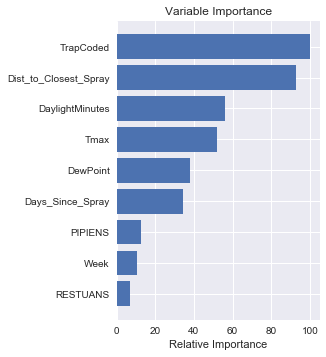

In [66]:
##VIZ taken straight from sklearn docs

feature_importance = gb.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X2.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [67]:
probabilities = gb.predict_proba(X_test) # Need the second value

probability_list = [] # Becomes the list of probabilities
for i in probabilities:
    probability_list.append(i[1])
    probabilities = probability_list

roc_auc = roc_auc_score(y_test, probabilities)
print roc_auc

0.845486793862


In [68]:
params = {
    "loss": ("deviance", "exponential"),
    "n_estimators": (100, 125, 150, 175),
    "max_depth": (4, 5, 6, 7)
}

In [69]:
gb = GradientBoostingClassifier()

In [70]:
gridgrad = GridSearchCV(gb, params, verbose = 1, cv = cv, n_jobs = -1)
gridgrad.fit(X2, y)
print gridgrad
print "Best score: "
print gridgrad.best_score_
print gridgrad.best_estimator_
print gridgrad.best_params_

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   43.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=24, shuffle=True),
       error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': (100, 125, 150, 175), 'loss': ('deviance', 'exponential'), 'max_depth': (4, 5, 6, 7)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)
Best score: 
0.948210048489
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=4,
              max_featu

In [71]:
geebee = GradientBoostingClassifier( loss = "exponential", max_depth = 4)

In [72]:
geebee.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [73]:
y_pred = geebee.predict(X_test)
print geebee.score(X_test, y_test)

0.949046577055


In [74]:
s = cross_val_score(geebee, X_train, y_train, cv=cv, n_jobs=1)

In [75]:
print(str(s.mean()) + " +/- " +  str(s.std()))

0.946720133993 +/- 0.000779282387158


In [76]:
confusion_matrix(y_test, y_pred)

array([[3033,    0],
       [ 163,    3]])

In [77]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97      3033
          1       1.00      0.02      0.04       166

avg / total       0.95      0.95      0.93      3199



In [78]:
probabilities = geebee.predict_proba(X_test) # Need the second value

probability_list = [] # Becomes the list of probabilities
for i in probabilities:
    probability_list.append(i[1])
    probabilities = probability_list

roc_auc = roc_auc_score(y_test, probabilities)
print roc_auc

0.833734542522


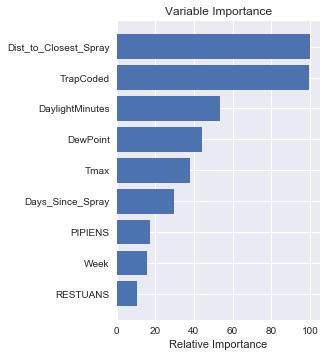

In [79]:
##VIZ taken straight from sklearn docs

feature_importance = geebee.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X2.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [80]:
##Do we go with rf_upgrade??

In [81]:
test.shape

(116293, 43)

In [82]:
train.shape

(9693, 45)

In [83]:
test.head()

,Species,Block,Trap,Latitude,Longitude,AddressAccuracy,YMD,PIPIENS,RESTUANS,SALINARIUS,TERRITANS,Station,Tmax,Tmin,DewPoint,WetBulb,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Tavg_int,Normal_Temp,Depart_calc,RA,BR,TS,HZ,SN,FG,FG+,FU,DZ,VC,MI,BC,Days_Since_Spray,Dist_to_Closest_Spray,Week,DaylightMinutes
0,CULEX PIPIENS/RESTUANS,41,T002,41.95469,-87.800991,9,2008-06-11 00:00:00,1,1,0,0,2,86,66,55,64.0,1900-01-01 04:16:00,1900-01-01 19:26:00,0.0,29.34,29.97,9.4,18,10.4,76,67.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,720,1.5,24,910
1,CULEX RESTUANS,41,T002,41.95469,-87.800991,9,2008-06-11 00:00:00,0,1,0,0,2,86,66,55,64.0,1900-01-01 04:16:00,1900-01-01 19:26:00,0.0,29.34,29.97,9.4,18,10.4,76,67.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,720,1.5,24,910
2,CULEX PIPIENS,41,T002,41.95469,-87.800991,9,2008-06-11 00:00:00,1,0,0,0,2,86,66,55,64.0,1900-01-01 04:16:00,1900-01-01 19:26:00,0.0,29.34,29.97,9.4,18,10.4,76,67.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,720,1.5,24,910
3,CULEX SALINARIUS,41,T002,41.95469,-87.800991,9,2008-06-11 00:00:00,0,0,1,0,2,86,66,55,64.0,1900-01-01 04:16:00,1900-01-01 19:26:00,0.0,29.34,29.97,9.4,18,10.4,76,67.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,720,1.5,24,910
4,CULEX TERRITANS,41,T002,41.95469,-87.800991,9,2008-06-11 00:00:00,0,0,0,1,2,86,66,55,64.0,1900-01-01 04:16:00,1900-01-01 19:26:00,0.0,29.34,29.97,9.4,18,10.4,76,67.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,720,1.5,24,910


In [84]:
X2.head()

,TrapCoded,RESTUANS,PIPIENS,DaylightMinutes,DewPoint,Tmax,Week,Dist_to_Closest_Spray,Days_Since_Spray
0,1,1,1,896,59,88,22,1.5,720
1,1,1,0,896,59,88,22,1.5,720
2,6,1,0,896,58,88,22,1.5,720
3,13,1,1,896,58,88,22,1.5,720
4,13,1,0,896,58,88,22,1.5,720


In [85]:
test["TrapCoded"] = le.fit_transform(test.Trap)

In [86]:
targetX = test[["TrapCoded", "RESTUANS", "PIPIENS", "DaylightMinutes", 
                "DewPoint", "Tmax", "Week", "Dist_to_Closest_Spray", "Days_Since_Spray"]]

In [87]:
targety = pd.read_csv("../assets/test.csv")

In [88]:
targety = targety[["Id"]]

In [89]:
targety.dtypes

Id    int64
dtype: object

In [90]:
targety.shape

(116293, 1)

In [91]:
REF = RandomForestClassifier(criterion = "entropy", class_weight = "balanced", max_depth = 80, n_jobs = -1, verbose = 1)

In [92]:
REF.fit(X2, y)
y_pred = REF.predict_proba(targetX)


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


In [93]:
y_pred.shape

(116293, 2)

In [94]:
y_pred

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

In [95]:
probability_list = [] # Becomes the list of probabilities
for i in y_pred:
    probability_list.append(i[1])
    y_pred = probability_list

In [96]:
sum(probability_list) ##checking that it's not predicting all zeros

4181.5392285524149

In [97]:
from __future__ import division

In [98]:
3272/116293

0.028135829327646546

In [99]:
targety["WnvPresent"] = probability_list

In [100]:
targety[targety.WnvPresent != 0.0]

,Id,WnvPresent
986,987,0.090133
3411,3412,0.090133
4622,4623,0.090133
6509,6510,0.100000
6573,6574,0.100000
7040,7041,0.090133
7095,7096,0.075279
7119,7120,0.075279
7342,7343,0.100000
7350,7351,0.100000


In [101]:
submission1 = targety.to_csv("../assets/submission1_mg.csv", index = False, encoding = "utf-8")

In [102]:
REF2 = RandomForestClassifier()

In [103]:
REF2.fit(X2, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [104]:
y_pred2 = REF2.predict_proba(targetX)

In [105]:
probability_list = [] # Becomes the list of probabilities
for i in y_pred2:
    probability_list.append(i[1])
    y_pred2 = probability_list

In [106]:
sum(probability_list)

3335.0480194797897

In [107]:
targety["WnvPresent"] = probability_list

In [108]:
submission2 = targety.to_csv("../assets/submission2_mg.csv", index = False, encoding = "utf-8")

In [109]:
geebee = GradientBoostingClassifier( loss = "exponential", max_depth = 4)

In [110]:
geebee.fit(X2, y)
y_pred3 = geebee.predict_proba(targetX)
probability_list = [] # Becomes the list of probabilities
for i in y_pred3:
    probability_list.append(i[1])
y_pred3 = probability_list

In [111]:
sum(probability_list)

1636.1563767766029

In [112]:
targety["WnvPresent"] = probability_list

In [113]:
submission3 = targety.to_csv("../assets/submission3_mg.csv", index = False, encoding = "utf-8")

In [114]:
pipeline = Pipeline([
    ("rfpipe", RandomForestClassifier(class_weight = "balanced", n_jobs = -1, verbose = 1)),
    ("gbpipe", GradientBoostingClassifier(verbose = 1))
])

In [115]:
pipeline.fit(X2, y)

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
/Applications/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


      Iter       Train Loss   Remaining Time 
         1           0.3951            0.45s
         2           0.3854            0.38s
         3           0.3782            0.35s
         4           0.3723            0.31s
         5           0.3670            0.30s
         6           0.3630            0.29s
         7           0.3592            0.28s
         8           0.3562            0.27s
         9           0.3533            0.26s
        10           0.3507            0.26s
        20           0.3356            0.21s
        30           0.3277            0.17s
        40           0.3222            0.14s
        50           0.3186            0.12s
        60           0.3157            0.09s
        70           0.3131            0.07s
        80           0.3105            0.05s
        90           0.3077            0.02s
       100           0.3045            0.00s


Pipeline(steps=[('rfpipe', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0....=100, presort='auto', random_state=None,
              subsample=1.0, verbose=1, warm_start=False))])

In [116]:
y_pred4 = pipeline.predict_proba(targetX)

/Applications/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


In [117]:
probability_list = [] # Becomes the list of probabilities
for i in y_pred4:
    probability_list.append(i[1])
    y_pred4 = probability_list

In [118]:
sum(probability_list)

5903.1605220727379

In [119]:
targety["WnvPresent"] = probability_list

In [120]:
submission4 = targety.to_csv("../assets/submission4_mg.csv", index = False, encoding = "utf-8")

In [121]:
gb = GradientBoostingClassifier()

In [122]:
gb.fit(X2, y)
y_pred5 = gb.predict_proba(targetX)
probability_list = [] # Becomes the list of probabilities
for i in y_pred5:
    probability_list.append(i[1])
    y_pred5 = probability_list

In [123]:
sum(probability_list)

2833.5322225190521

In [124]:
targety["WnvPresent"] = probability_list

In [125]:
submission5 = targety.to_csv("../assets/submission5_mg.csv", index = False, encoding = "utf-8")

In [126]:
geebee = GradientBoostingClassifier( loss = "exponential", max_depth = 5, n_estimators = 150)

In [127]:
geebee.fit(X2, y)
y_pred6 = geebee.predict_proba(targetX)
probability_list = [] # Becomes the list of probabilities
for i in y_pred6:
    probability_list.append(i[1])
y_pred6 = probability_list

In [128]:
sum(probability_list)

899.28943923089059

In [129]:
targety["WnvPresent"] = probability_list

In [130]:
submission6 = targety.to_csv("../assets/submission6_mg.csv", index = False, encoding = "utf-8")

In [131]:
#geebee = GradientBoostingClassifier( loss = "exponential", max_depth = 7, n_estimators = 200)

In [132]:
# geebee.fit(X2, y)
# y_pred7 = geebee.predict_proba(targetX)
# probability_list = [] # Becomes the list of probabilities
#  for i in y_pred7:
#     probability_list.append(i[1])
#     y_pred7 = probability_list

In [133]:
# sum(probability_list)

361.76320457903432

In [134]:
# targety["WnvPresent"] = probability_list

In [135]:
# submission7 = targety.to_csv("../assets/submission7_mg.csv", index = False, encoding = "utf-8")

In [136]:
# geebee = GradientBoostingClassifier( loss = "deviance", max_depth = 6, n_estimators = 160)

In [137]:
# geebee.fit(X2, y)
# y_pred8 = geebee.predict_proba(targetX)
# probability_list = [] # Becomes the list of probabilities
# for i in y_pred8:
#     probability_list.append(i[1])
#     y_pred8 = probability_list

In [138]:
# sum(probability_list)

1581.4233988469623

In [139]:
# targety["WnvPresent"] = probability_list

In [140]:
# submission8 = targety.to_csv("../assets/submission8_mg.csv", index = False, encoding = "utf-8")

In [141]:
# geebee = GradientBoostingClassifier( loss = "exponential", max_depth = 6, n_estimators = 160)

In [142]:
# geebee.fit(X2, y)
# y_pred9 = geebee.predict_proba(targetX)
# probability_list = [] # Becomes the list of probabilities
# for i in y_pred9:
#     probability_list.append(i[1])
#     y_pred9 = probability_list

In [143]:
# sum(probability_list)

627.68612834753867

In [144]:
# targety["WnvPresent"] = probability_list

In [145]:
# submission9 = targety.to_csv("../assets/submission9_mg.csv", index = False, encoding = "utf-8")

In [146]:
# geebee = GradientBoostingClassifier( loss = "exponential", max_depth = 4, n_estimators = 90)

In [147]:
# geebee.fit(X2, y)
# y_pred10 = geebee.predict_proba(targetX)
# probability_list = [] # Becomes the list of probabilities
# for i in y_pred10:
#     probability_list.append(i[1])
#     y_pred10 = probability_list

In [148]:
# sum(probability_list)

1716.9473381263476

In [149]:
# targety["WnvPresent"] = probability_list

In [150]:
# submission10 = targety.to_csv("../assets/submission10_mg.csv", index = False, encoding = "utf-8")

In [151]:
# X.head()

,Block,Latitude,Longitude,AddressAccuracy,PIPIENS,RESTUANS,SALINARIUS,TERRITANS,Station,Tmax,Tmin,DewPoint,WetBulb,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Tavg_int,Normal_Temp,Depart_calc,RA,BR,TS,HZ,SN,FG,FG+,FU,DZ,VC,MI,BC,Days_Since_Spray,Dist_to_Closest_Spray,Week,DaylightMinutes,TrapCoded
0,41,41.954690,-87.800991,9,1,1,0,0,2,88,65,59,66.0,0.0,29.44,30.09,5.8,16,7.4,77,64.0,13.0,0,1,0,1,0,0,0,0,0,0,0,0,720,1.5,22,896,1
1,41,41.954690,-87.800991,9,0,1,0,0,2,88,65,59,66.0,0.0,29.44,30.09,5.8,16,7.4,77,64.0,13.0,0,1,0,1,0,0,0,0,0,0,0,0,720,1.5,22,896,1
2,62,41.994991,-87.769279,9,0,1,0,0,1,88,60,58,65.0,0.0,29.39,30.11,5.8,18,6.5,74,64.0,10.0,0,1,0,1,0,0,0,0,0,0,0,0,720,1.5,22,896,6
3,79,41.974089,-87.824812,8,1,1,0,0,1,88,60,58,65.0,0.0,29.39,30.11,5.8,18,6.5,74,64.0,10.0,0,1,0,1,0,0,0,0,0,0,0,0,720,1.5,22,896,13
4,79,41.974089,-87.824812,8,0,1,0,0,1,88,60,58,65.0,0.0,29.39,30.11,5.8,18,6.5,74,64.0,10.0,0,1,0,1,0,0,0,0,0,0,0,0,720,1.5,22,896,13


In [152]:
# X2.head()

,TrapCoded,RESTUANS,PIPIENS,DaylightMinutes,DewPoint,Tmax,Week,Dist_to_Closest_Spray,Days_Since_Spray
0,1,1,1,896,59,88,22,1.5,720
1,1,1,0,896,59,88,22,1.5,720
2,6,1,0,896,58,88,22,1.5,720
3,13,1,1,896,58,88,22,1.5,720
4,13,1,0,896,58,88,22,1.5,720


In [153]:
# X3 = X[["TrapCoded", "ResultSpeed", "Block", "RESTUANS", "PIPIENS", "DaylightMinutes", "DewPoint", "Tmax", "Week", "Dist_to_Closest_Spray", "Days_Since_Spray"]]

In [154]:
# targetX3 = test[["TrapCoded", "Block", "ResultSpeed", "RESTUANS", "PIPIENS", "DaylightMinutes", 
                "DewPoint", "Tmax", "Week", "Dist_to_Closest_Spray", "Days_Since_Spray"]]

In [155]:
# geebee = GradientBoostingClassifier( loss = "exponential", max_depth = 5, n_estimators = 150)

In [156]:
# geebee.fit(X3, y)
# y_pred11 = geebee.predict_proba(targetX3)
# probability_list = [] # Becomes the list of probabilities
# for i in y_pred11:
#     probability_list.append(i[1])
#     y_pred11 = probability_list

In [157]:
# sum(probability_list)

718.74863035186513

In [158]:
# targety["WnvPresent"] = probability_list

In [159]:
# submission11 = targety.to_csv("../assets/submission11_mg.csv", index = False, encoding = "utf-8")

In [160]:
# X4 = X[["TrapCoded", "ResultSpeed", "RESTUANS", "PIPIENS", "DaylightMinutes", "DewPoint", "Tmax", "Week", "Dist_to_Closest_Spray", "Days_Since_Spray"]]

In [161]:
# targetX4 = test[["TrapCoded", "ResultSpeed", "RESTUANS", "PIPIENS", "DaylightMinutes", 
#                 "DewPoint", "Tmax", "Week", "Dist_to_Closest_Spray", "Days_Since_Spray"]]

In [162]:
# geebee = GradientBoostingClassifier( loss = "exponential", max_depth = 5, n_estimators = 150)

In [163]:
# geebee.fit(X4, y)
# y_pred12 = geebee.predict_proba(targetX4)
# probability_list = [] # Becomes the list of probabilities
# for i in y_pred12:
#     probability_list.append(i[1])
# y_pred12 = probability_list

In [164]:
# sum(probability_list)

814.10715571157675

In [165]:
# targety["WnvPresent"] = probability_list

In [166]:
# submission12 = targety.to_csv("../assets/submission12_mg.csv", index = False, encoding = "utf-8")

In [167]:
# geebee = GradientBoostingClassifier( loss = "exponential", max_depth = 4, n_estimators = 170)

In [168]:
# geebee.fit(X4, y)
# y_pred13 = geebee.predict_proba(targetX4)
# probability_list = [] # Becomes the list of probabilities
# for i in y_pred13:
#     probability_list.append(i[1])
#     y_pred13 = probability_list

In [169]:
# sum(probability_list)

1252.1622502905882

In [170]:
# targety["WnvPresent"] = probability_list

In [171]:
# submission13 = targety.to_csv("../assets/submission13_mg.csv", index = False, encoding = "utf-8")

In [172]:
# geebee = GradientBoostingClassifier( loss = "exponential", max_depth = 6, n_estimators = 130)

In [173]:
# geebee.fit(X4, y)
# # y_pred14 = geebee.predict_proba(targetX4)
# probability_list = [] # Becomes the list of probabilities
# for i in y_pred14:
#     probability_list.append(i[1])
# y_pred14 = probability_list

In [174]:
# sum(probability_list)

588.54405376648242

In [175]:
# targety["WnvPresent"] = probability_list

In [176]:
# submission14 = targety.to_csv("../assets/submission14_mg.csv", index = False, encoding = "utf-8")

In [177]:
# #ROC/AUC graphs:
# from sklearn.metrics import roc_curve, auc

# #Remember, these graph probabilities of our predictions
# #we can use the .decision_function method of LogisticRegression() to get the array representing this
# y_score = model.decision_function(X_test)

# #Since our y has multiple classes (in this solution, 5), we need to reduce the scope of our roc curve
# #Typically roc is meant to predict binary results
# #We can solve it by iterating through the y_score array
# #The columns of y_score represent the different classes, and the rows represent the probabilities of the target result given by each row
# #We need to take each column of y_score, one at a time, to plot roc curves

# #create dictionaries to track results
# FPR = {}
# TPR = {}
# ROC_AUC = {}
# labels = []

# #set up plot space
# plt.figure(figsize=[10,10])
# plt.xlim([0.0, 1.05])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate', fontsize=18)
# plt.ylabel('True Positive Rate', fontsize=18)
# plt.title('Receiver operating characteristic for crime type prediction', fontsize=18)

# #create a function that will iterate through a multi-class output y_score
# def roc_auc_vis(y_score):
#     for i in range(y_score.shape[1]):

#         #define which class we're looking at
#         crime_type = model.classes_[i]

#         #calculate the false positive rate and true positive rate using 'roc_curve' on
#         #our true values (y_test) and the probabilities (y_score column for that crime type)
        
#         #instead of converting to dummy variables, we can define the 'pos_label' as the class we're looking at
#         #this will make the roc_curve look for that class as 'True' and all other values as 'False'
#         FPR[i], TPR[i], _ = roc_curve(y_test, y_score[:,i], pos_label=crime_type)
        
#         #with 'auc', calculate the auc using the FPR and TRP we just got
#         ROC_AUC[i] = auc(FPR[i], TPR[i])
        
#         #plot our roc curve
#         labels.append(crime_type)
#         plt.plot(FPR[i], TPR[i], label=crime_type % ROC_AUC[i], linewidth=4)
#         plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
        
#         plt.legend(loc='lower right')
        
# roc_auc_vis(y_score)

## Refining Sixth Submission

In [347]:
geebee = GradientBoostingClassifier( loss = "exponential", max_depth = 5, n_estimators = 150)

In [348]:
geebee.fit(X2, y)
y_pred6 = geebee.predict_proba(targetX)
probability_list = [] # Becomes the list of probabilities
for i in y_pred6:
    probability_list.append(i[1])
#y_pred6 = probability_list

In [349]:
sum(probability_list)

902.87811969191057

In [350]:
Y_pp = pd.DataFrame(geebee.predict_proba(targetX), columns=['No_WNV_pp','WNV_pp'])
print(Y_pp.iloc[0:10])

   No_WNV_pp    WNV_pp
0   0.999967  0.000033
1   0.999985  0.000015
2   0.999987  0.000013
3   0.999997  0.000003
4   0.999997  0.000003
5   0.999997  0.000003
6   0.999997  0.000003
7   0.999997  0.000003
8   0.999980  0.000020
9   0.999984  0.000016


In [351]:
Y_pp.head()

,No_WNV_pp,WNV_pp
0,0.999967,0.000033
1,0.999985,0.000015
2,0.999987,0.000013
3,0.999997,0.000003
4,0.999997,0.000003


In [183]:
from sklearn.metrics import roc_curve, auc

In [184]:
Y_score = geebee.decision_function(X2)

In [185]:
FPR = dict()
TPR = dict()
ROC_AUC = dict()

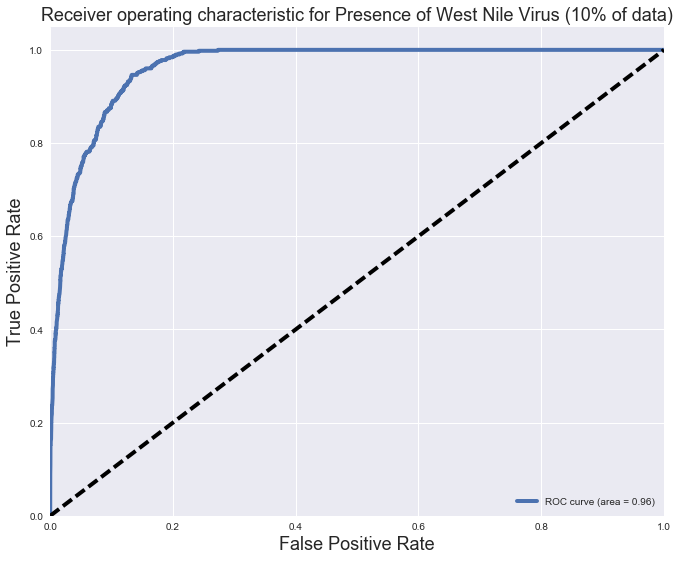

In [186]:
FPR[1], TPR[1], _ = roc_curve(y, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for Presence of West Nile Virus (10% of data)', fontsize=18)
plt.legend(loc="lower right")
plt.show()


In [187]:
targety["WnvPresent"] = probability_list

In [188]:
submissionsix = targety.to_csv("../assets/submissionsix_mg.csv", index = False, encoding = "utf-8")

# XGBOOST

In [189]:
# There are in general two ways that you can control overfitting in xgboost

# The first way is to directly control model complexity
# This include max_depth, min_child_weight and gamma
# The second way is to add randomness to make training robust to noise
# This include subsample, colsample_bytree
# You can also reduce stepsize eta, but needs to remember to increase num_round when you do so.


In [190]:
from xgboost import XGBClassifier

In [191]:
# xgb = XGBClassifier()

In [192]:
# xgb.fit(X2, y)
# y_pred15 = xgb.predict_proba(targetX)
# probability_list = [] # Becomes the list of probabilities
# for i in y_pred15:
#     probability_list.append(i[1])

In [193]:
# sum(probability_list)

2961.3695400139841

In [194]:
# targety["WnvPresent"] = probability_list

In [195]:
# submission15 = targety.to_csv("../assets/submission15_mg.csv", index = False, encoding = "utf-8")

In [196]:
# print(xgb)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


In [197]:
# exgeebee = XGBClassifier(objective = "binary:logistic")

In [198]:
# # params = {
# #     "loss": ("deviance", "exponential"),
# #     "n_estimators": (100, 125, 150, 175),
# #     "max_depth": (4, 5, 6, 7)
# # }

# params = {
#     "n_estimators" : (210, 220, 230),
#     "max_depth" : (3, 4, 5, 6),
#     "learning_rate" : (0.1, 0.2)
# }

In [199]:
# gridlock = GridSearchCV(exgeebee, params, verbose = 1, cv = cv, n_jobs = -1)
# gridlock.fit(X2, y)
# print gridlock
# print "Best score: "
# print gridlock.best_score_
# print gridlock.best_estimator_
# print gridlock.best_params_

In [200]:
# exgeebee = XGBClassifier(objective = "binary:logistic", n_estimators = 220, max_depth = 5, learning_rate = 0.2)

In [201]:
# exgeebee.fit(X2, y)
# y_pred16 = exgeebee.predict_proba(targetX)
# probability_list = [] # Becomes the list of probabilities
# for i in y_pred16:
#     probability_list.append(i[1])

In [202]:
# sum(probability_list)

1714.1510076572172

In [203]:
# targety["WnvPresent"] = probability_list

In [204]:
# submission16 = targety.to_csv("../assets/submission16_mg.csv", index = False, encoding = "utf-8")

In [205]:
# exgeebee = XGBClassifier(n_estimators = 150, max_depth = 5, learning_rate = 0.2)

In [206]:
# exgeebee.fit(X2, y)
# y_pred17 = exgeebee.predict_proba(targetX)
# probability_list = [] # Becomes the list of probabilities
# for i in y_pred17:
#     probability_list.append(i[1])

In [207]:
# sum(probability_list)

2136.2239505411808

In [208]:
# targety["WnvPresent"] = probability_list

In [209]:
# submission17 = targety.to_csv("../assets/submission17_mg.csv", index = False, encoding = "utf-8")

In [210]:
# exgeebee = XGBClassifier(n_estimators = 220, max_depth = 4, learning_rate = 0.05)

In [211]:
# exgeebee.fit(X2, y)
# y_pred18 = exgeebee.predict_proba(targetX)
# probability_list = [] # Becomes the list of probabilities
# for i in y_pred18:
#     probability_list.append(i[1])

In [212]:
# sum(probability_list)

2911.2120378325344

In [213]:
# targety["WnvPresent"] = probability_list

In [214]:
# submission18 = targety.to_csv("../assets/submission18_mg.csv", index = False, encoding = "utf-8")

In [215]:
# exgeebee = XGBClassifier(n_estimators = 220, max_depth = 3, learning_rate = 0.07)

In [216]:
# exgeebee.fit(X2, y)
# y_pred19 = exgeebee.predict_proba(targetX)
# probability_list = [] # Becomes the list of probabilities
# for i in y_pred19:
#     probability_list.append(i[1])

In [217]:
# sum(probability_list)

2808.9563226256723

In [218]:
# targety["WnvPresent"] = probability_list

In [219]:
# submission19 = targety.to_csv("../assets/submission19_mg.csv", index = False, encoding = "utf-8")

In [220]:
# exgeebee = XGBClassifier(n_estimators = 180, max_depth = 3, learning_rate = 0.08)

In [221]:
# exgeebee.fit(X2, y)
# y_pred20 = exgeebee.predict_proba(targetX)
# probability_list = [] # Becomes the list of probabilities
# for i in y_pred20:
#     probability_list.append(i[1])

In [222]:
# sum(probability_list)

3060.0904131108837

In [223]:
# targety["WnvPresent"] = probability_list

In [224]:
# submission20 = targety.to_csv("../assets/submission20_mg.csv", index = False, encoding = "utf-8")

In [225]:
# exgeebee = XGBClassifier(n_estimators = 180, max_depth = 3, learning_rate = 0.12)

In [226]:
# exgeebee.fit(X2, y)
# y_pred21 = exgeebee.predict_proba(targetX)
# probability_list = [] # Becomes the list of probabilities
# for i in y_pred21:
#     probability_list.append(i[1])

In [227]:
# sum(probability_list)

2741.5545511738237

In [228]:
# targety["WnvPresent"] = probability_list

In [229]:
# submission21 = targety.to_csv("../assets/submission21_mg.csv", index = False, encoding = "utf-8")

In [235]:
# exgeebee = XGBClassifier(n_estimators = 160, max_depth = 3, learning_rate = 0.09)

In [237]:
# exgeebee.fit(X2, y)
# y_pred22 = exgeebee.predict_proba(targetX)
# probability_list = [] # Becomes the list of probabilities
# for i in y_pred22:
#     probability_list.append(i[1])

In [238]:
# sum(probability_list)

2702.7651285640022

In [239]:
# targety["WnvPresent"] = probability_list

In [240]:
# submission22 = targety.to_csv("../assets/submission22_mg.csv", index = False, encoding = "utf-8")

In [241]:
# print(exgeebee)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.09, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=160, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


In [340]:
# exgeebee = XGBClassifier(n_estimators = 220, max_depth = 3, learning_rate = 0.1, 
#                          gamma = 0.01, colsample_bytree = 0.9)

In [341]:
# exgeebee.fit(X2, y)
# y_pred23 = exgeebee.predict_proba(targetX)
# probability_list = [] # Becomes the list of probabilities
# for i in y_pred23:
#     probability_list.append(i[1])

In [342]:
# sum(probability_list)

3101.47471694251

In [343]:
# targety["WnvPresent"] = probability_list

In [344]:
# submission23 = targety.to_csv("../assets/submission23_mg.csv", index = False, encoding = "utf-8")

In [345]:
X2.to_csv("../assets/bestmodelXtrain_mg.csv", index = False, encoding = "utf-8")

In [346]:
targetX.to_csv("../assets/bestmodelXtest_mg.csv", index = False, encoding = "utf-8")

In [354]:
modtrain = pd.concat([X2, train.NumMosquitos, y], axis = 1)

In [359]:
modtrain.head()

,TrapCoded,RESTUANS,PIPIENS,DaylightMinutes,DewPoint,Tmax,Week,Dist_to_Closest_Spray,Days_Since_Spray,NumMosquitos,WnvPresent
0,1,1,1,896,59,88,22,1.5,720,1,0
1,1,1,0,896,59,88,22,1.5,720,1,0
2,6,1,0,896,58,88,22,1.5,720,1,0
3,13,1,1,896,58,88,22,1.5,720,1,0
4,13,1,0,896,58,88,22,1.5,720,4,0


In [360]:
modtest = pd.concat([targetX, targety], axis = 1)

In [362]:
modtest.drop("Id", axis = 1, inplace = True)

In [363]:
modtest.head()

,TrapCoded,RESTUANS,PIPIENS,DaylightMinutes,DewPoint,Tmax,Week,Dist_to_Closest_Spray,Days_Since_Spray,WnvPresent
0,1,1,1,910,55,86,24,1.5,720,0.000407
1,1,1,0,910,55,86,24,1.5,720,0.000169
2,1,0,1,910,55,86,24,1.5,720,0.000338
3,1,0,0,910,55,86,24,1.5,720,0.000117
4,1,0,0,910,55,86,24,1.5,720,0.000117


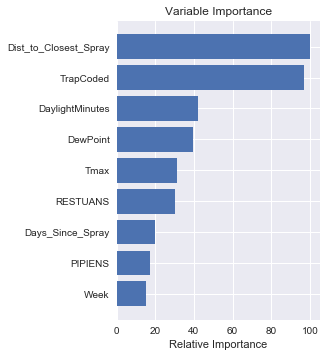

In [364]:
feature_importance = geebee.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X2.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

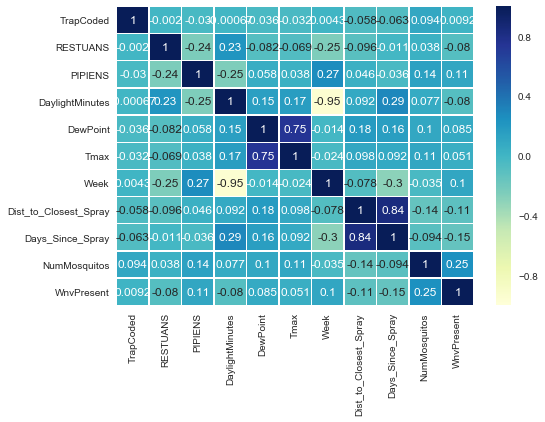

In [366]:
sns.heatmap(modtrain.corr(), linewidths = 0.4, annot = True, cmap = "YlGnBu")

In [367]:
modmodtrain = modtrain.drop("NumMosquitos", axis = 1)

In [370]:
plt.rcParams['figure.figsize'] = (14, 12) ## I want my figures to be bigger
plt.rcParams['font.size'] = 17 ##and legible

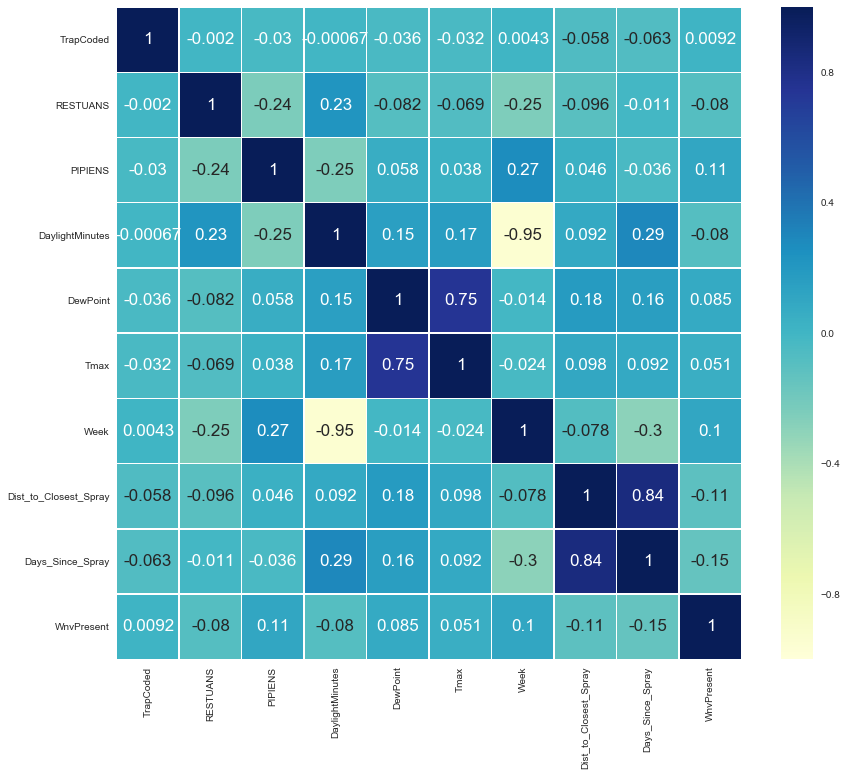

In [371]:
sns.heatmap(modmodtrain.corr(), linewidths = 0.4, annot = True, cmap = "YlGnBu")

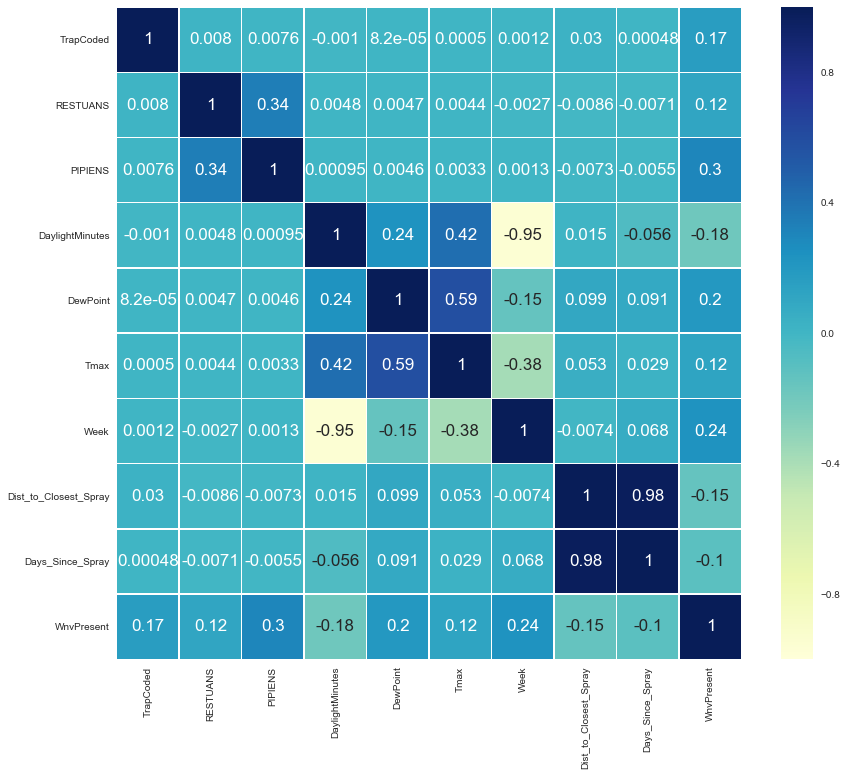

In [374]:
sns.heatmap(modtest.corr(), linewidths = 0.4, annot = True, cmap = "YlGnBu")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

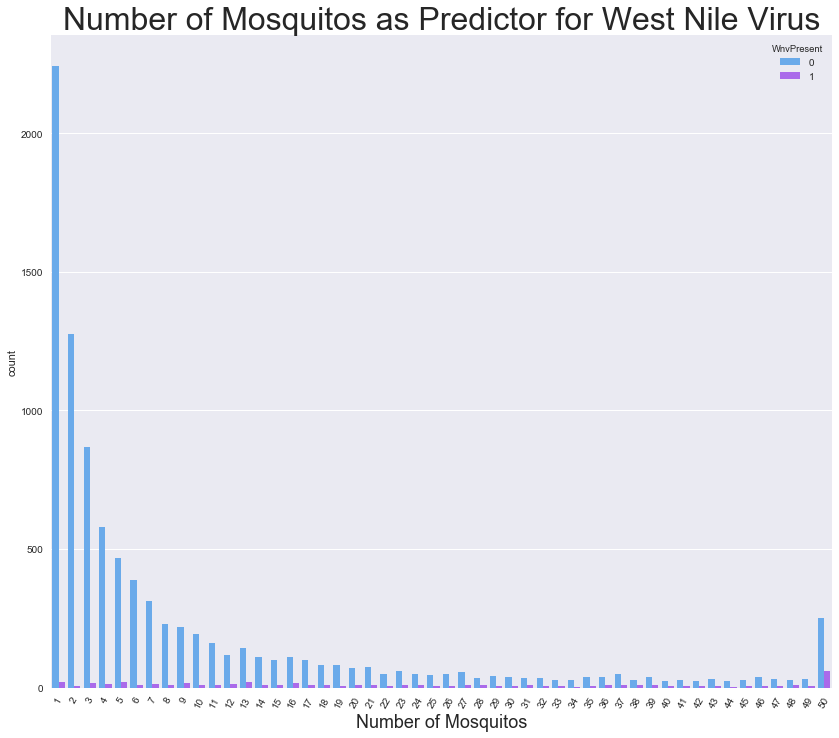

In [379]:
sns.countplot(x = "NumMosquitos", hue = "WnvPresent", data = modtrain, palette = "cool")
plt.xlabel("Number of Mosquitos", fontsize = 18)
plt.title("Number of Mosquitos as Predictor for West Nile Virus", fontsize = 32)
plt.xticks(rotation = 60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

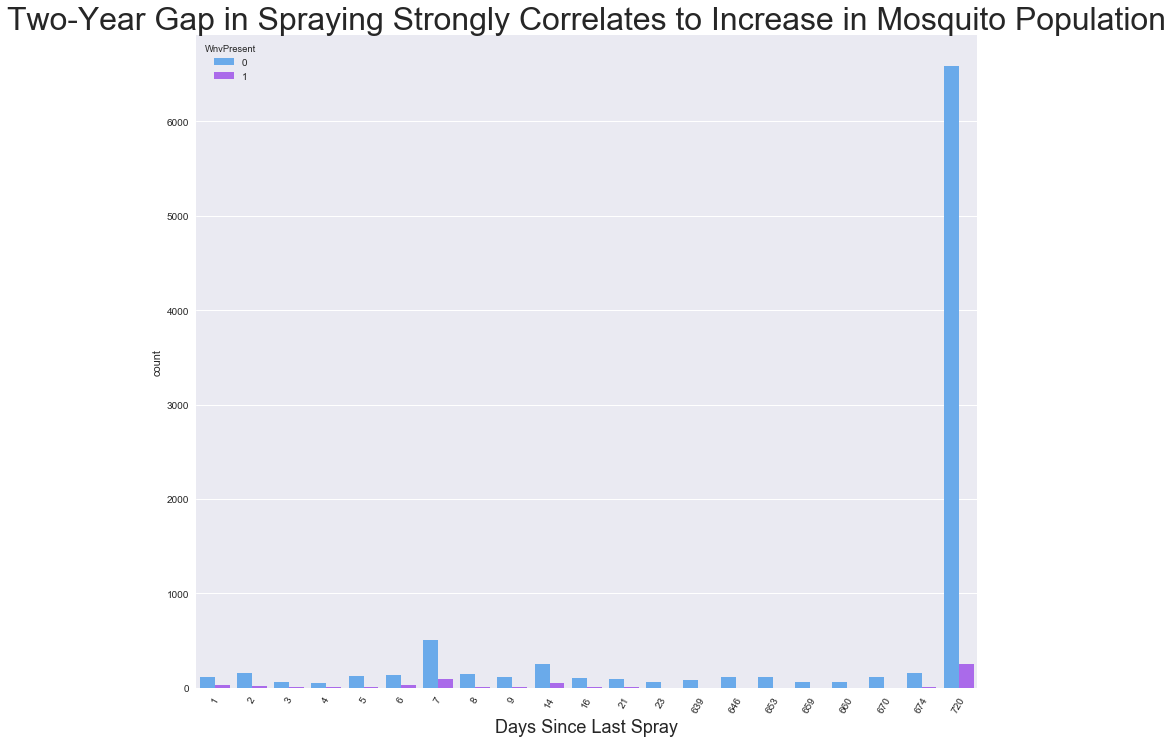

In [381]:
sns.countplot(x = "Days_Since_Spray", hue = "WnvPresent", data = modmodtrain, palette = "cool")
plt.xlabel("Days Since Last Spray", fontsize = 18)
plt.title("Two-Year Gap in Spraying Strongly Correlates to Increase in Mosquito Population", fontsize = 32)
plt.xticks(rotation = 60)

In [400]:
plt.rcParams['figure.figsize'] = (14, 12)

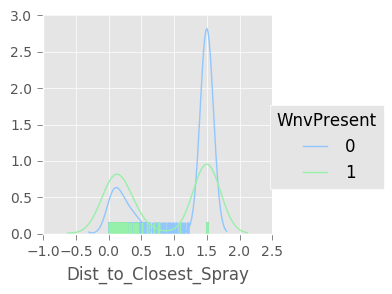

In [405]:
plt.style.use("seaborn-pastel")
fig = sns.FacetGrid(modmodtrain, hue = "WnvPresent")
fig.map(sns.distplot, "Dist_to_Closest_Spray", hist = False, rug = True)
fig.add_legend()

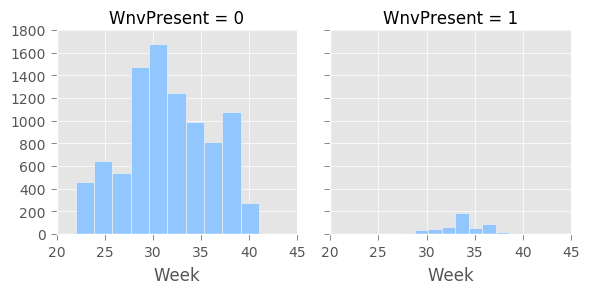

In [406]:
fig = sns.FacetGrid(modmodtrain, col = "WnvPresent")
fig.map(plt.hist, "Week")

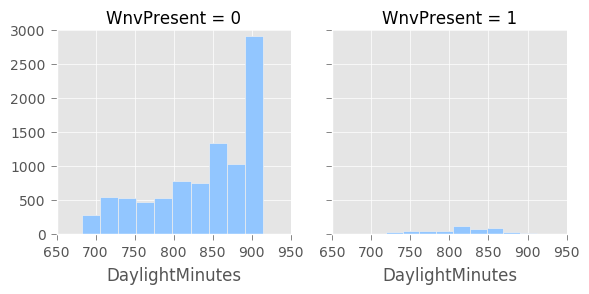

In [409]:
fig = sns.FacetGrid(modmodtrain, col = "WnvPresent")
fig.map(plt.hist, "DaylightMinutes")

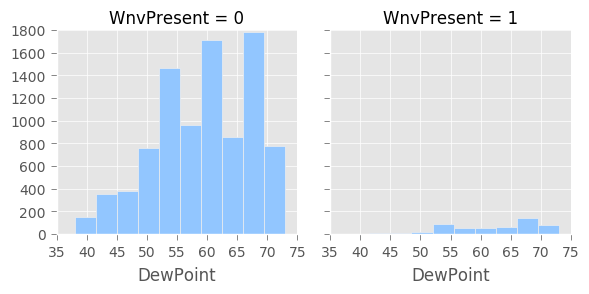

In [410]:
fig = sns.FacetGrid(modmodtrain, col = "WnvPresent")
fig.map(plt.hist, "DewPoint")

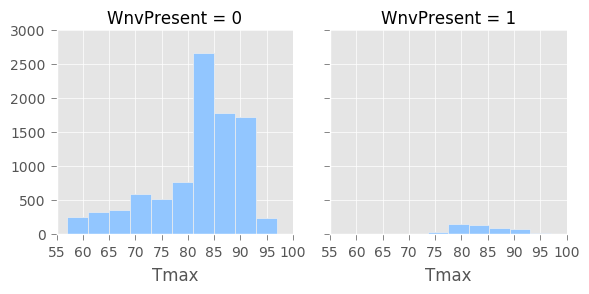

In [413]:
fig = sns.FacetGrid(modmodtrain, col = "WnvPresent")
fig.map(plt.hist, "Tmax")

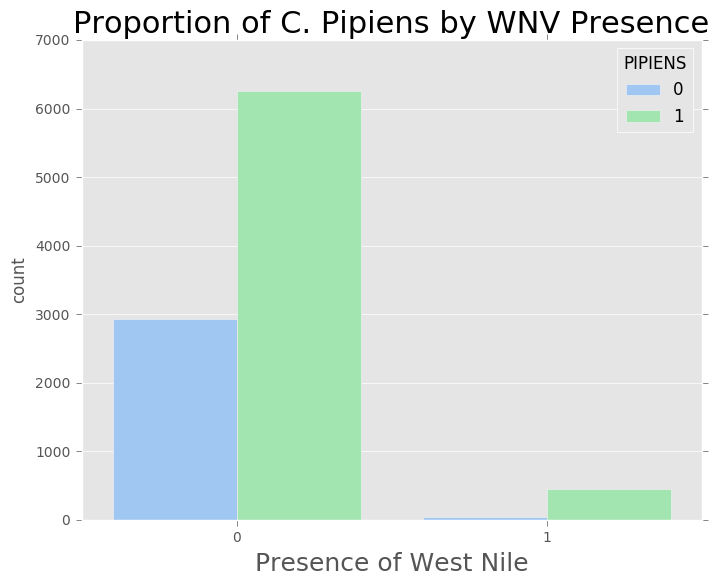

In [419]:
sns.countplot(x="WnvPresent", hue = "PIPIENS", data = modmodtrain)
plt.xlabel("Presence of West Nile", fontsize = 18)
plt.title("Proportion of C. Pipiens by WNV Presence", fontsize = 22)

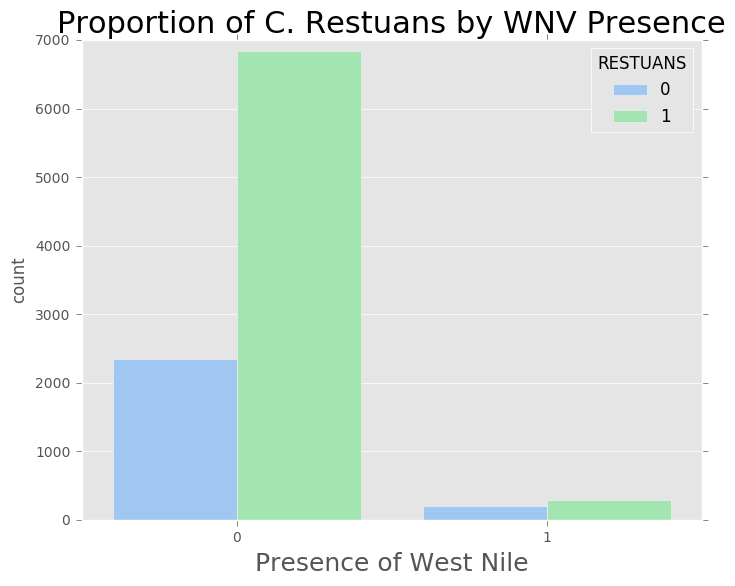

In [420]:
sns.countplot(x="WnvPresent", hue = "RESTUANS", data = modmodtrain)
plt.xlabel("Presence of West Nile", fontsize = 18)
plt.title("Proportion of C. Restuans by WNV Presence", fontsize = 22)